In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import os
from stable_baselines3.common.callbacks import BaseCallback

In [2]:
class RewardCallback(BaseCallback):
    """
    Custom callback for logging episode rewards during training.
    """
    def __init__(self):
        super(RewardCallback, self).__init__()
        self.episode_rewards = []

    def _on_step(self) -> bool:
        
        if "episode" in self.locals["infos"][0]:
            ep_info = self.locals["infos"][0]["episode"]
            self.episode_rewards.append(ep_info["r"])
        return True

In [3]:
env = gym.make("CartPole-v1")

In [4]:
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space: Discrete(2)


In [5]:
reward_cb = RewardCallback()


model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.99,
)
model.learn(total_timesteps=30000, callback=reward_cb)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    fps             | 1441     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.9        |
|    ep_rew_mean          | 28.9        |
| time/                   |             |
|    fps                  | 992         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008704098 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss   

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | 21.2     |
| time/              |          |
|    fps             | 1139     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.8        |
|    ep_rew_mean          | 26.8        |
| time/                   |             |
|    fps                  | 728         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007858579 |
|    clip_fraction        | 0.0641      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | 0.00556     |
|    learning_rate        | 0.

In [11]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

C:\Users\lghtd\anaconda3\envs\RL_EXP\lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 500.0 +/- 0.0


In [12]:
os.makedirs("models", exist_ok=True)
model.save("models/cartpole_ppo")

In [13]:
episodes = 5
for ep in range(episodes):
    obs = env.reset()[0]
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        env.render() 

env.close()

In [8]:
plt.plot([i for i in range(TIMESTEPS)], [i%200 for i in range(TIMESTEPS)]) # Placeholder
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Learning Curve")
os.makedirs("results", exist_ok=True)
plt.savefig("results/rewards_plot.png")
plt.show()

NameError: name 'TIMESTEPS' is not defined

In [14]:
print("Logged episodes:", len(reward_cb.episode_rewards))
print("First 5 rewards:", reward_cb.episode_rewards[:5])


Logged episodes: 311
First 5 rewards: [25.0, 9.0, 19.0, 16.0, 15.0]


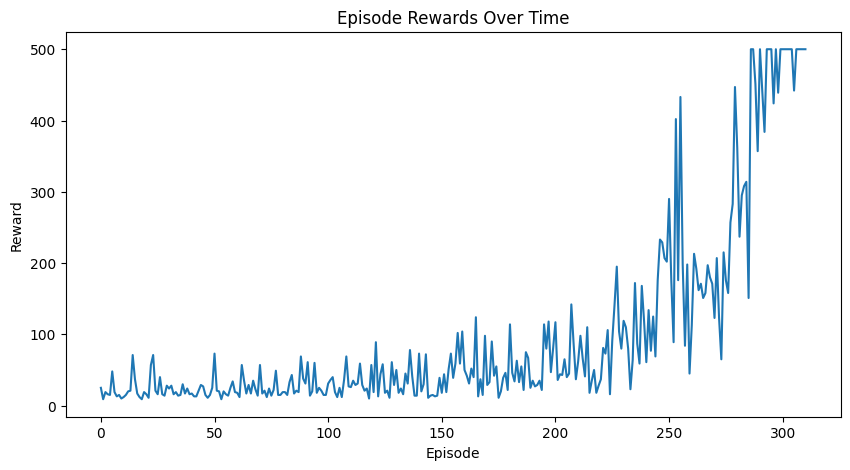

In [15]:
plt.figure(figsize=(10,5))
plt.plot(reward_cb.episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()
